<a href="https://colab.research.google.com/github/cipherchawla/loan-prediction-logistic-regression/blob/main/logistic_regression_banking_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/bank-additional-full.csv",sep=";")

#sep is a parameter that specifies that the separator is a semicolon.

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41194,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41195,74.0,NaN,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41196,74.0,retired,married,NaN,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It contains information related to direct marketing campaigns conducted by a
Portuguese banking institution.

The goal of using this dataset is often to build a predictive model
that can accurately predict whether a client will subscribe to a
term deposit based on the available attributes.

In [ ]:
df["y"].value_counts()

no     36556
yes     4640
Name: y, dtype: int64

In [ ]:
df["y"].unique()

array(['no', 'yes', nan], dtype=object)

In [ ]:
df["y"].nunique()

2

In [ ]:
# EDA:exploratory data analysis

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41194,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41195,74.0,NaN,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41196,74.0,retired,married,NaN,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41198,74.0,retired,married,professional.course,no,yes,NaN,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,NaN,-50.8,1.028,4963.6,no


In [ ]:
df.shape

(41199, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41195.000000,41196.000000,41196.000000,41196.000000,41196.000000,41196.000000,41195.000000,41196.000000,41196.000000,41196.000000
mean,40.030319,258.281265,2.567676,962.482547,0.173124,0.081656,93.575867,-40.504600,3.620787,5166.996405
std,10.431818,259.254211,2.769751,186.893451,0.494987,1.570894,0.578999,4.629972,1.734655,72.300104
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df.describe(include = "all")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41195.000000,41194,41194,41194,41195,41196,41195,41195,41196,41196,...,41196.000000,41196.000000,41196.000000,41194,41196.000000,41195.000000,41196.000000,41196.000000,41196.000000,41196
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24934,12168,32595,21584,33957,26151,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36556
mean,40.030319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567676,962.482547,0.173124,NaN,0.081656,93.575867,-40.504600,3.620787,5166.996405,NaN
std,10.431818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.769751,186.893451,0.494987,NaN,1.570894,0.578999,4.629972,1.734655,72.300104,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [ ]:
df.isnull()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41194,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41195,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41196,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41197,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [ ]:
df.isnull().sum()

age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 3
dtype: int64

In [ ]:
df.isnull().sum().sum()

76

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41193,94.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
df["pdays"].unique()

array([999.,   6.,   4.,   3.,   5.,   1.,   0.,  10.,   7.,   8.,   9.,
        11.,   2.,  12.,  13.,  14.,  15.,  16.,  21.,  17.,  18.,  22.,
        25.,  26.,  19.,  27.,  20.])

In [ ]:
# outliers detection

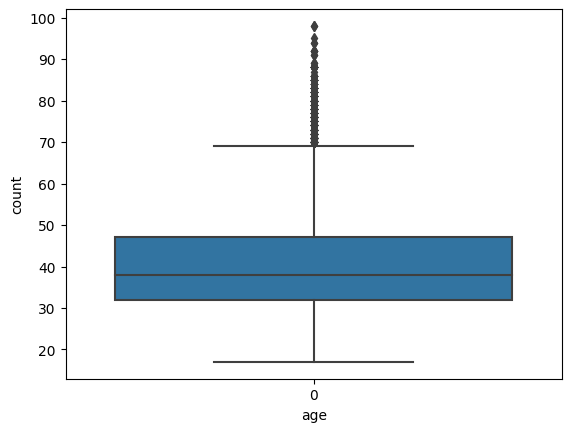

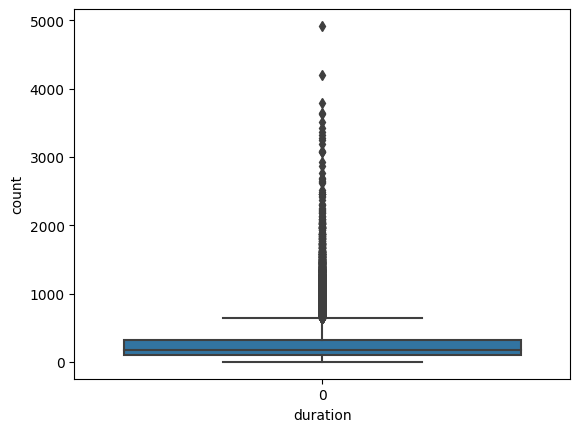

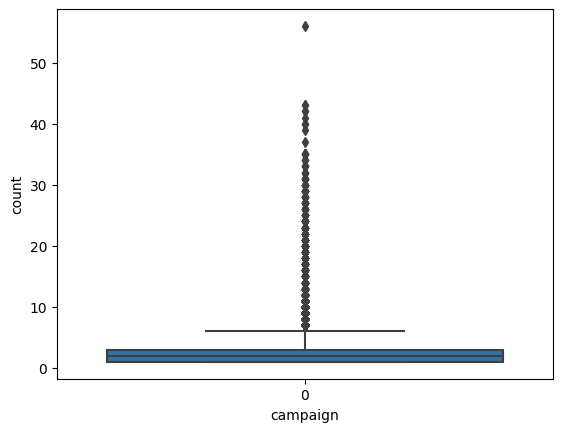

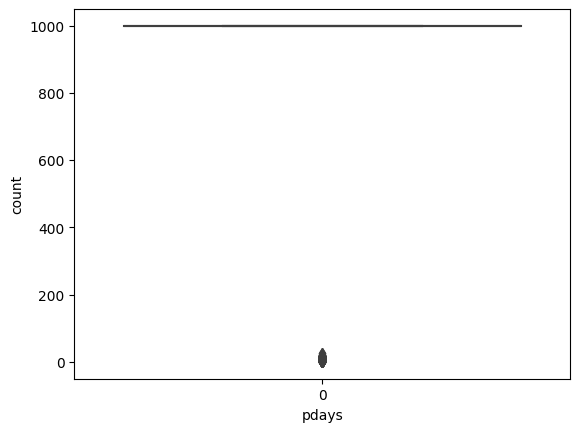

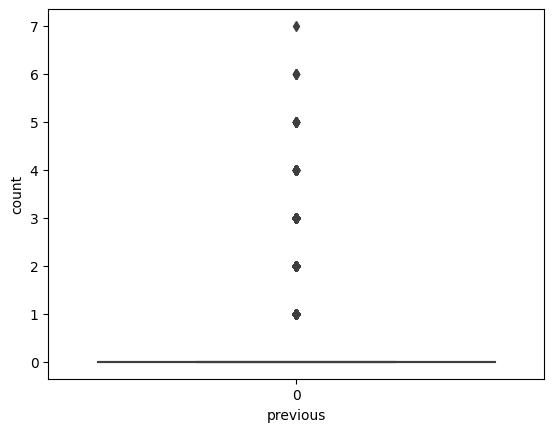

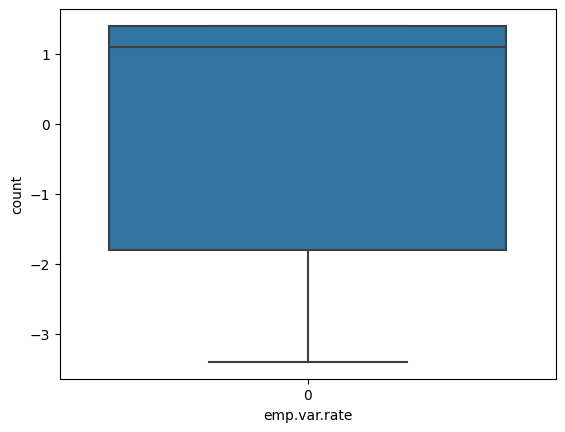

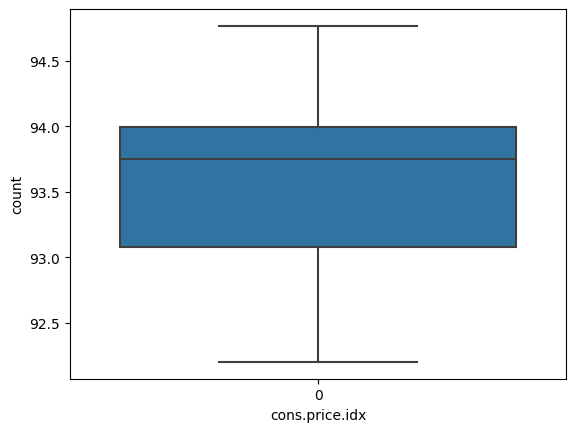

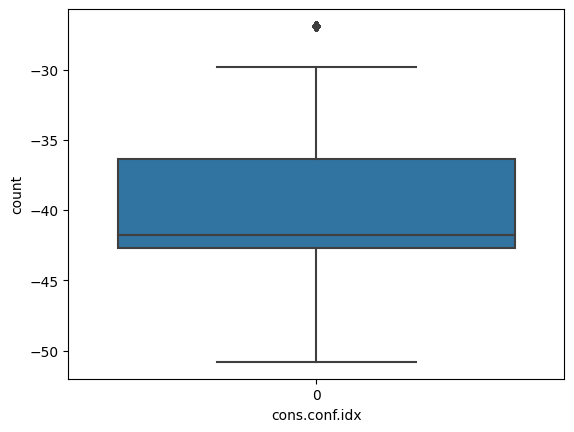

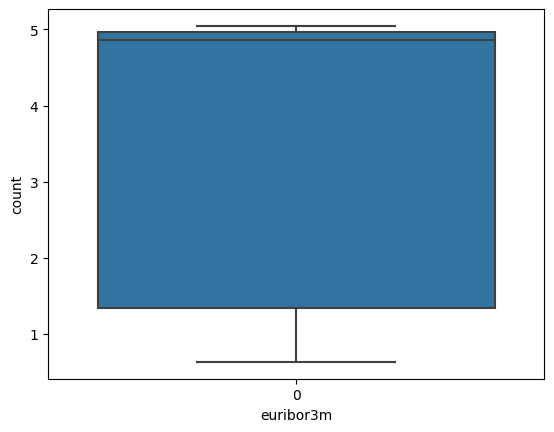

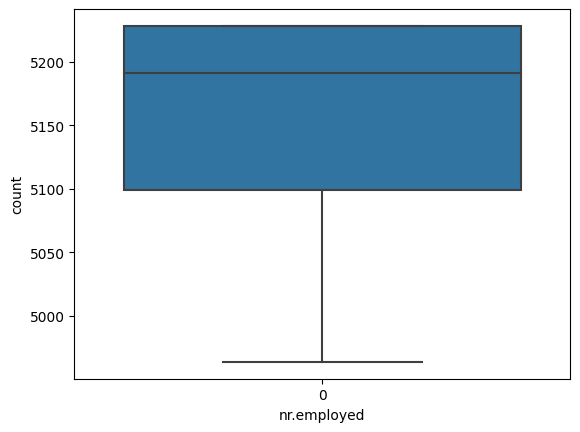

In [ ]:
#removing the outliers from the numerical columns and plotting the boxplot.
for col in df.columns:
  if((df[col].dtype=="int64") or (df[col].dtype=="float64")):
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

In [ ]:
# outliers removal

In [ ]:
out_list = ["age","duration","campaign","cons.conf.idx"]

for i in out_list:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)


  IQR = Q3 - Q1
  df = df[(df[i]>=Q1-1.5*IQR) & (df[i]<=Q3+1.5*IQR)]


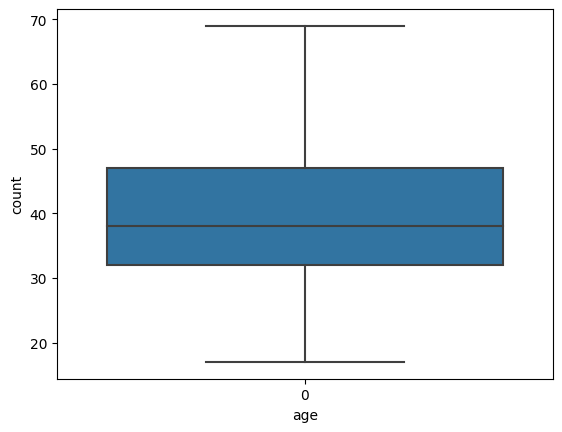

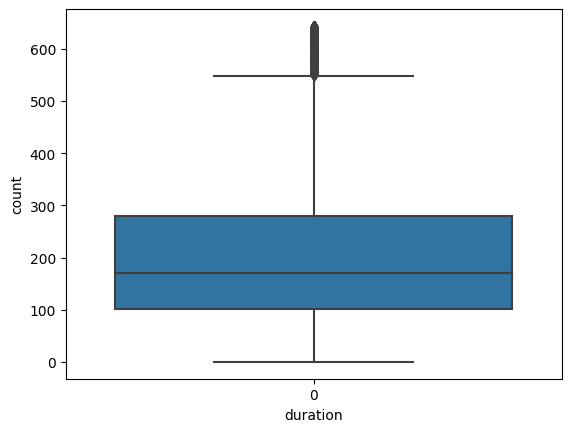

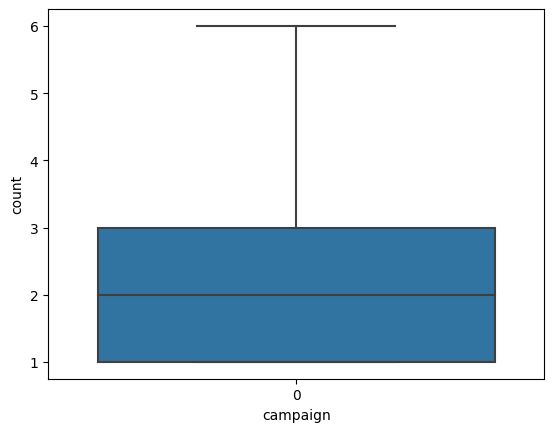

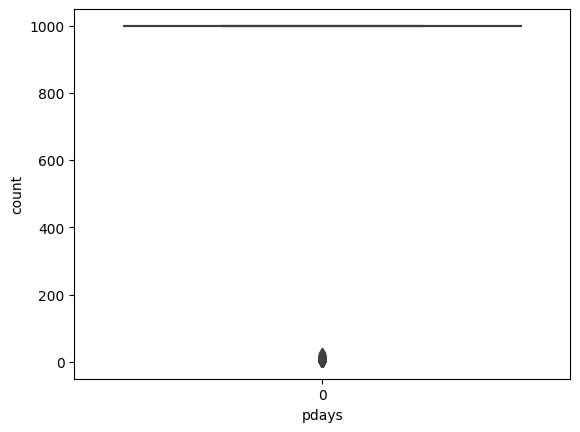

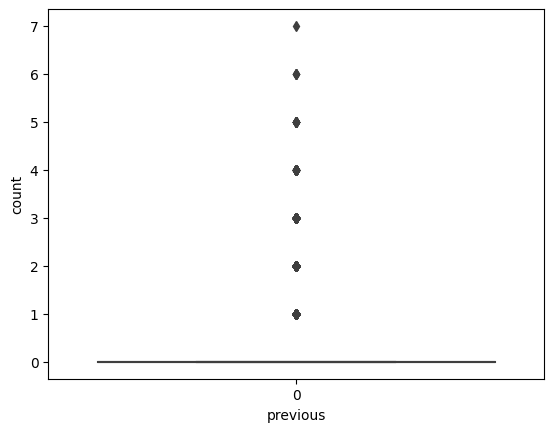

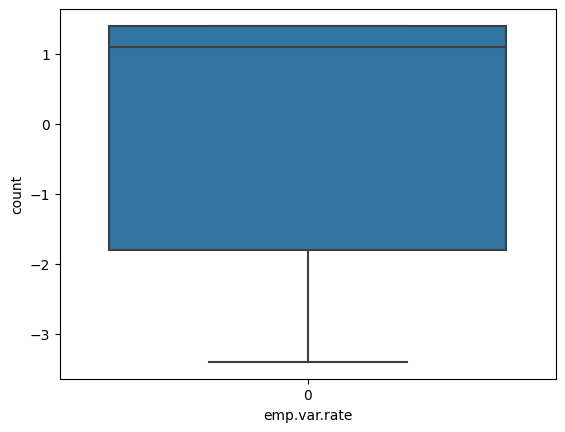

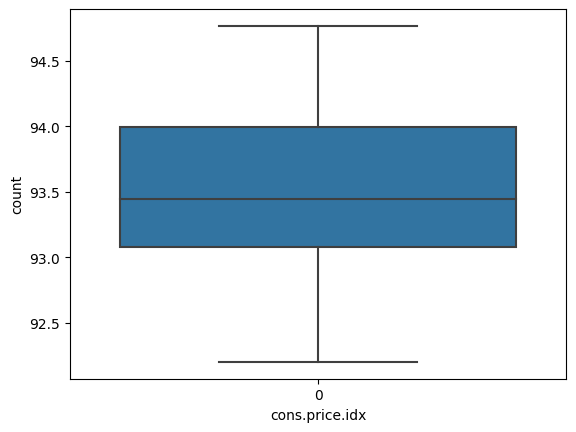

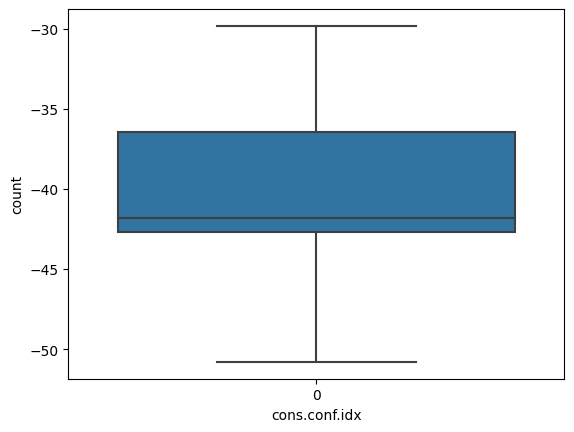

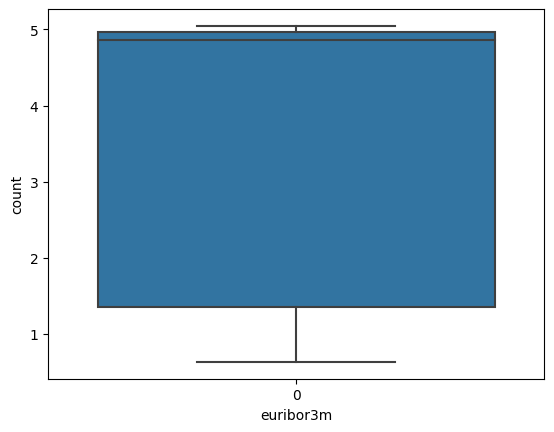

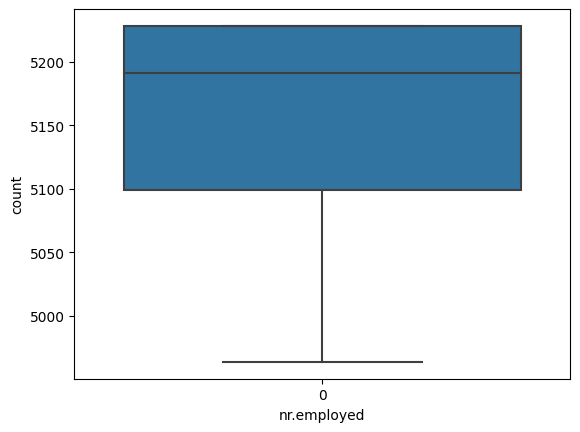

In [ ]:
#outliers detection

for col in df.columns:
    if ((df[col].dtype == "int64") or (df[col].dtype == "float64")):
        sns.boxplot(df[col])
        plt.xlabel(col)
        plt.ylabel('count')
        plt.show()

In [ ]:
#feature selection

In [ ]:
df.duplicated().sum()


11

In [ ]:
df = df.drop_duplicates()

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37.0,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29.0,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1.0,9.0,1.0,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [ ]:
df["job"].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [ ]:
# encoding: converting categorical data into numerical data

# one hot encoding ----------> pd.get_dummies()
# label encoding---------> label encoder

In [ ]:
data1 = pd.get_dummies(df)

In [ ]:
data1

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56.0,261.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57.0,149.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37.0,226.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40.0,151.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56.0,307.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37.0,281.0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1
41182,29.0,112.0,1.0,9.0,1.0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,0,1,1,0
41184,46.0,383.0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41185,56.0,189.0,2.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0


In [ ]:
x = df.iloc[:,:-1]   #excluding target column
y = df.iloc[:,-1]

In [ ]:
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37.0,admin.,married,university.degree,no,yes,no,cellular,nov,fri,281.0,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41182,29.0,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,112.0,1.0,9.0,1.0,success,-1.1,94.767,-50.8,1.028,4963.6
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383.0,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,189.0,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6


In [ ]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
41181    yes
41182     no
41184     no
41185     no
41186    yes
Name: y, Length: 35165, dtype: object

In [ ]:
# lets convert the categorical data to numerical data
#label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
for i in x.columns:
  if x[i].dtype == "object":
    x[i] = le.fit_transform(x[i])
    print(le.classes_)

['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
['divorced' 'married' 'single' 'unknown']
['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
['no' 'unknown' 'yes']
['no' 'unknown' 'yes']
['no' 'unknown' 'yes']
['cellular' 'telephone']
['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
['fri' 'mon' 'thu' 'tue' 'wed']
['failure' 'nonexistent' 'success']


In [ ]:
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56.0,3,1,0,0,0,0,1,6,1,261.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
1,57.0,7,1,3,1,0,0,1,6,1,149.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
2,37.0,7,1,3,0,2,0,1,6,1,226.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
3,40.0,0,1,1,0,0,0,1,6,1,151.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
4,56.0,7,1,3,0,0,2,1,6,1,307.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37.0,0,1,6,0,2,0,0,7,0,281.0,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6
41182,29.0,10,2,0,0,2,0,0,7,0,112.0,1.0,9.0,1.0,2,-1.1,94.767,-50.8,1.028,4963.6
41184,46.0,1,1,5,0,0,0,0,7,0,383.0,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56.0,5,1,6,0,2,0,0,7,0,189.0,2.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6


In [ ]:
# # feature selection : feature selection is a process which is used to select most relevent and important
# #      features which can be used ahead for the model building

# 1) vif --------> variance inflation factor( vif value for the columns less than 6 or 5 is considered)
# 2) IV ---------> Information values, classifies my independent features into a week,best,avg etc categories
# 3) RFE --------> Recursive Feature elimination identifies a dataset's key features
# 4) Correlation --------> independependent features that shows a correlation values greater than 0.5 with the dependent
#        feature is considered.

In [ ]:
# RFE:

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
# rfe = RFE(model, n_features_to_select)

rfe = RFE(model)

In [ ]:
rfe.fit(x,y)

RFE(estimator=LogisticRegression())

In [ ]:
rfe.support_

array([False, False,  True,  True,  True, False, False,  True,  True,
        True, False,  True, False,  True, False, False, False,  True,
        True, False])

In [ ]:
# returns the index values of the colummns that are important
selected_indices = [i for i,data in enumerate(rfe.support_) if data == True]
selected_indices

[2, 3, 4, 7, 8, 9, 11, 13, 17, 18]

In [ ]:
column_names = x.columns
selected_column_name = [column_names[i] for i in selected_indices]
selected_column_name

['marital',
 'education',
 'default',
 'contact',
 'month',
 'day_of_week',
 'campaign',
 'previous',
 'cons.conf.idx',
 'euribor3m']

In [ ]:
x = x.loc[:,['marital',
 'education',
 'default',
 'contact',
 'month',
 'day_of_week',
 'campaign',
 'previous',
 'cons.conf.idx',
 'euribor3m']]

In [ ]:
x


,marital,education,default,contact,month,day_of_week,campaign,previous,cons.conf.idx,euribor3m
0,1,0,0,1,6,1,1.0,0.0,-36.4,4.857
1,1,3,1,1,6,1,1.0,0.0,-36.4,4.857
2,1,3,0,1,6,1,1.0,0.0,-36.4,4.857
3,1,1,0,1,6,1,1.0,0.0,-36.4,4.857
4,1,3,0,1,6,1,1.0,0.0,-36.4,4.857
...,...,...,...,...,...,...,...,...,...,...
41181,1,6,0,0,7,0,1.0,0.0,-50.8,1.028
41182,2,0,0,0,7,0,1.0,1.0,-50.8,1.028
41184,1,5,0,0,7,0,1.0,0.0,-50.8,1.028
41185,1,6,0,0,7,0,2.0,0.0,-50.8,1.028


In [ ]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
41181    yes
41182     no
41184     no
41185     no
41186    yes
Name: y, Length: 35165, dtype: object

In [ ]:
#Next step train test
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.75, random_state = 99)
#random state is very important to train the model
#Train size here refers to the size of the dataset used for training the model

In [ ]:
x_train

,marital,education,default,contact,month,day_of_week,campaign,previous,cons.conf.idx,euribor3m
32573,2,3,0,0,6,1,1.0,0.0,-46.2,1.299
5818,2,6,0,1,6,1,2.0,0.0,-36.4,4.857
7595,0,6,0,1,6,0,4.0,0.0,-36.4,4.864
31259,1,5,0,0,6,4,1.0,0.0,-46.2,1.334
33403,2,1,1,0,6,3,3.0,0.0,-46.2,1.291
...,...,...,...,...,...,...,...,...,...,...
27645,2,6,0,0,7,0,2.0,0.0,-42.0,4.021
25206,1,6,0,0,7,3,2.0,0.0,-42.0,4.153
40434,1,6,0,0,1,1,3.0,2.0,-38.3,0.904
27454,1,7,1,0,7,0,2.0,1.0,-42.0,4.021


In [ ]:
x_test

,marital,education,default,contact,month,day_of_week,campaign,previous,cons.conf.idx,euribor3m
30894,1,2,0,0,6,3,3.0,1.0,-46.2,1.344
25678,1,3,0,1,7,4,1.0,0.0,-42.0,4.120
35391,1,6,0,0,6,0,2.0,0.0,-46.2,1.250
15074,2,2,0,0,3,2,1.0,0.0,-42.7,4.958
15504,1,5,0,0,3,0,5.0,0.0,-42.7,4.957
...,...,...,...,...,...,...,...,...,...,...
2544,1,3,0,1,6,3,2.0,0.0,-36.4,4.856
7922,1,6,0,1,4,1,4.0,0.0,-41.8,4.865
39295,1,6,0,0,5,3,1.0,2.0,-34.8,0.646
26887,2,6,0,0,7,2,2.0,0.0,-42.0,4.076


In [ ]:
y_test

30894     no
25678     no
35391     no
15074     no
15504     no
        ... 
2544      no
7922      no
39295    yes
26887     no
9730      no
Name: y, Length: 8792, dtype: object

In [ ]:
y_train

32573     no
5818     yes
7595      no
31259     no
33403     no
        ... 
27645     no
25206     no
40434     no
27454     no
33888     no
Name: y, Length: 26373, dtype: object

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
y_pred #predicting the target column

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

In [ ]:
#comparing the predicted data with the actual data
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy_score(y_test,y_pred)

0.9284576888080073

In [ ]:
confusion_matrix(y_test,y_pred)

array([[8098,   48],
       [ 581,   65]])

In [ ]:
8098+65

8163

In [ ]:
8098+48+581+65

8792

In [ ]:
8163/8792

0.9284576888080073

In [ ]:
# recall = tp/tp+fn  -------> sensitivity or true positive rate
# recall measures the ability of a model to correctly identify all positive instances in a datase
8098+48

8146

In [ ]:
8098/8146

0.9941075374416892

In [ ]:
"""
specificity is the true negative rate
F1 score = 2*(precision*recall)/(precision + recall)
"""

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
c_report = classification_report(y_test,y_pred)

In [ ]:
print(c_report)

              precision    recall  f1-score   support

          no       0.93      0.99      0.96      8146
         yes       0.58      0.10      0.17       646

    accuracy                           0.93      8792
   macro avg       0.75      0.55      0.57      8792
weighted avg       0.91      0.93      0.90      8792

